# Project: Building MySQL Database for VHS Rental Store | Cristiane Carneiro

## Data Cleaning : film.csv

In this file, one can review the step by step cleaning process for table film.csv 

### Import 

We start by importing the libraries we are going to use and loading the database

In [214]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [215]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt  

import seaborn as sns 

%matplotlib inline

In [216]:
films = pd.read_csv('/Users/criscarneiro/desktop/ironhack/6_Projects/sql-data-base-building/data/raw/film.csv')

In [217]:
films.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,NaN,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,NaN,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,NaN,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,NaN,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,NaN,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42


### Good practices

Some good practices before we continue with the exercise

In [218]:
#creating a back-up with the original table 

filmsoriginal = films.copy()

In [219]:
#ensuring column names are clean 

films.columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'original_language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'last_update'],
      dtype='object')

In [220]:
films.columns = [c.lower().replace(' ', '_') for c in films.columns]

films.columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'original_language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'last_update'],
      dtype='object')

In [221]:
#checking for duplicates 

films.duplicated().any() #there are no duplicates 

False

### Explore 

Exploratory analysis to understand the data base (e.g,. description, column types, searching for null values) 

In [222]:
#this is a repository of films, with their respective data (e.g., their title, language, lenght, etc) 

films.head(1)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,NaN,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42


In [223]:
#we have 13 columns, and 1000 entries (rows) in our original database

filmsoriginal.shape

(1000, 13)

In [224]:
#here we can see the type of each of the columns  
#we also see column original_language_id is 100% null 

films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film_id               1000 non-null   int64  
 1   title                 1000 non-null   object 
 2   description           1000 non-null   object 
 3   release_year          1000 non-null   int64  
 4   language_id           1000 non-null   int64  
 5   original_language_id  0 non-null      float64
 6   rental_duration       1000 non-null   int64  
 7   rental_rate           1000 non-null   float64
 8   length                1000 non-null   int64  
 9   replacement_cost      1000 non-null   float64
 10  rating                1000 non-null   object 
 11  special_features      1000 non-null   object 
 12  last_update           1000 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 101.7+ KB


In [225]:
#description table 
#here we can see the #of unique values, and the mode of each field. 

films.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
film_id,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
title,1000,1000,ACADEMY DINOSAUR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,1000,1000,A Epic Drama of a Feminist And a Mad Scientist...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,1000.0,NaN,NaN,NaN,2006.0,0.0,2006.0,2006.0,2006.0,2006.0,2006.0
language_id,1000.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
original_language_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rental_duration,1000.0,NaN,NaN,NaN,4.985,1.411654,3.0,4.0,5.0,6.0,7.0
rental_rate,1000.0,NaN,NaN,NaN,2.98,1.646393,0.99,0.99,2.99,4.99,4.99
length,1000.0,NaN,NaN,NaN,115.272,40.426332,46.0,80.0,114.0,149.25,185.0
replacement_cost,1000.0,NaN,NaN,NaN,19.984,6.050833,9.99,14.99,19.99,24.99,29.99


### Null values

As stated above, it seems one of the columns is fully null. See per below:

In [226]:
nan_cols = films.isna().sum()

nan_cols

film_id                    0
title                      0
description                0
release_year               0
language_id                0
original_language_id    1000
rental_duration            0
rental_rate                0
length                     0
replacement_cost           0
rating                     0
special_features           0
last_update                0
dtype: int64

In [227]:
#I will exclude that column from the database

films.drop('original_language_id', axis=1, inplace=True)

In [228]:
nan_cols = films.isna().sum()

nan_cols

film_id             0
title               0
description         0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
special_features    0
last_update         0
dtype: int64

### Other cleaning 

#### film_id

In [229]:
#we got a list of int values, which seem to be IDs for the each film
#this is the most appropriate datatype (although we will optimize it later)

films.film_id.dtype

dtype('int64')

In [230]:
#it seems all the IDs are unique values 

len(films.film_id.unique())

1000

In [231]:
#films.film_id.unique()

#### title

In [232]:
#object type, as strings 

films.title.dtype

dtype('O')

In [233]:
#all film titles unique

len(films.title.unique())

1000

In [234]:
#not a fan of uppercase, will trim names

films.title = films.title.apply(lambda X: X.title().strip())

In [235]:
films.head(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42


#### description

In [236]:
#object type, as strings 

films.description.dtype

dtype('O')

In [237]:
#all descriptions unique

len(films.description.unique())

1000

In [238]:
#prefer only first letter capitalized, will trim 

films.description = films.description.apply(lambda x: '. '.join(map(str.capitalize, x.split('. '))))

In [239]:
films.head(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,Academy Dinosaur,A epic drama of a feminist and a mad scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,Ace Goldfinger,A astounding epistle of a database administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,Adaptation Holes,A astounding reflection of a lumberjack and a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42


In [240]:
films.special_features#.apply(lambda x: x.split(','))

0             Deleted Scenes,Behind the Scenes
1                      Trailers,Deleted Scenes
2                      Trailers,Deleted Scenes
3               Commentaries,Behind the Scenes
4                               Deleted Scenes
                        ...                   
995                 Trailers,Behind the Scenes
996                 Trailers,Behind the Scenes
997                             Deleted Scenes
998                    Trailers,Deleted Scenes
999    Trailers,Commentaries,Behind the Scenes
Name: special_features, Length: 1000, dtype: object

#### release_year

In [241]:
#data type is int 

films.release_year.dtype

dtype('int64')

In [242]:
#it seems all titles were released in 2006

films.release_year.value_counts()

release_year
2006    1000
Name: count, dtype: int64

In [243]:
#converting data type

films.release_year = pd.to_datetime(films.release_year).dt.strftime('%Y')

#### language_id

In [244]:
#data type is int - correct, although will optimize it later 
#this should be linked to table languages 

films.language_id.dtype

dtype('int64')

In [245]:
#all moves are in a single language 

len(films.language_id.unique())

1

In [246]:
#all moves are in English

films.language_id.unique()

array([1])

#### rental_duration

In [247]:
#data type is int - this is appropriate
#seems to be #of days you can keep the move for 

films.rental_duration.dtype

dtype('int64')

In [248]:
#one can keep the movie for 3 through 7 days

films.rental_duration.unique()

array([6, 3, 7, 5, 4])

#### rental_rate 

In [249]:
#data type is float - this is appropriate 

films.rental_rate.dtype

dtype('float64')

In [250]:
#one can keep the movie for 3 through 7 days

films.rental_rate.unique()

array([0.99, 4.99, 2.99])

#### length

In [251]:
#this is lenght in min 
#will keep as int, and optimize later

films.length.dtype

dtype('int64')

<Axes: >

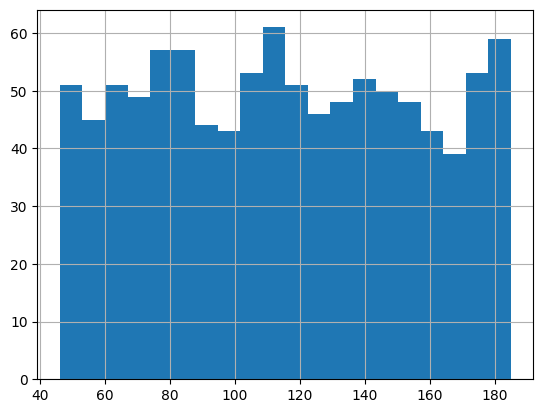

In [252]:
#duration frequency distribution - quite even 

films.length.hist(bins=20)

#### replacement_cost

In [253]:
#data type is float - this is appropriate 

films.replacement_cost.dtype

dtype('float64')

In [254]:
#different replacement costs of films  

films.replacement_cost.unique()

array([20.99, 12.99, 18.99, 26.99, 22.99, 17.99, 28.99, 15.99, 21.99,
       24.99, 16.99, 23.99, 10.99, 14.99, 27.99,  9.99, 19.99, 11.99,
       29.99, 25.99, 13.99])

#### rating 

In [255]:
#data type is object - this is appropriate as those are strings 

films.rating.dtype

dtype('O')

In [256]:
#there are five different ratings  

films.rating.unique()

array(['PG', 'G', 'NC-17', 'PG-13', 'R'], dtype=object)

#### special_features

In [257]:
#data type is object - this is appropriate as those are strings 

films.special_features.dtype

dtype('O')

In [258]:
#there are 15 different strings / list os strings for special features

len(films.special_features.unique())

15

In [259]:
###ideally, the unique descriptors should be in columns, with values Y (present) N (not present); for the purpose of this exercise, I will treat this as a comment column unless otherwise needed through the exercise

#### last_update

In [260]:
#this column is type 'object'. It seems tough it would be most appropriate as a 'time type'

films.last_update.dtype

dtype('O')

In [261]:
#all the values are the same, indicating all the names were last updated on Feb 15th 2006 05:03

films.last_update.value_counts()

last_update
2006-02-15 05:03:42    1000
Name: count, dtype: int64

In [262]:
#I will convert the data to datetime64

films.last_update = pd.to_datetime(films.last_update)

In [263]:
#converted 

films.last_update.dtype

dtype('<M8[ns]')

### Column names and duplicates 

In [264]:
films.columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'special_features', 'last_update'],
      dtype='object')

In [265]:
newcolumns = ['film_id', 'title', 'description', 'release_year', 'language_id',
       'rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'special_features', 'film_last_update']
      

In [266]:
films.columns = newcolumns

In [267]:
#checking for duplicates 

films.duplicated().any() #there are no duplicates 

False

In [268]:
films.head(2)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,film_last_update
0,1,Academy Dinosaur,A epic drama of a feminist and a mad scientist...,1970,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,Ace Goldfinger,A astounding epistle of a database administrat...,1970,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42


### Column types and optimization 

I will optimize the database for memory 

In [269]:
films.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   film_id           1000 non-null   int64         
 1   title             1000 non-null   object        
 2   description       1000 non-null   object        
 3   release_year      1000 non-null   object        
 4   language_id       1000 non-null   int64         
 5   rental_duration   1000 non-null   int64         
 6   rental_rate       1000 non-null   float64       
 7   length            1000 non-null   int64         
 8   replacement_cost  1000 non-null   float64       
 9   rating            1000 non-null   object        
 10  special_features  1000 non-null   object        
 11  film_last_update  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 472.8 KB


In [270]:
#downcast int

for c in films.select_dtypes('integer'):
    
    films[c] = pd.to_numeric(films[c], downcast='integer')

In [271]:
#downcast floats

for c in films.select_dtypes('float'):
    
    films[c] = pd.to_numeric(films[c], downcast='float')

In [272]:
#object columns to 'category'

for c in films.select_dtypes(include='object'):
    
    films[c] = films[c].astype('category')   

In [273]:
#no need for 'nanoseconds' precision

films.film_last_update = films.film_last_update.astype('datetime64[s]')

### Comparison output vs. original

In [274]:
#original_language_id removed 

print(filmsoriginal.shape)
print(films.shape)

(1000, 13)
(1000, 12)


In [275]:
#compare memory usage vs. original, following below

films.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype        
---  ------            --------------  -----        
 0   film_id           1000 non-null   int16        
 1   title             1000 non-null   category     
 2   description       1000 non-null   category     
 3   release_year      1000 non-null   category     
 4   language_id       1000 non-null   int8         
 5   rental_duration   1000 non-null   int8         
 6   rental_rate       1000 non-null   float32      
 7   length            1000 non-null   int16        
 8   replacement_cost  1000 non-null   float32      
 9   rating            1000 non-null   category     
 10  special_features  1000 non-null   category     
 11  film_last_update  1000 non-null   datetime64[s]
dtypes: category(5), datetime64[s](1), float32(2), int16(2), int8(2)
memory usage: 312.3 KB


In [276]:
filmsoriginal.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film_id               1000 non-null   int64  
 1   title                 1000 non-null   object 
 2   description           1000 non-null   object 
 3   release_year          1000 non-null   int64  
 4   language_id           1000 non-null   int64  
 5   original_language_id  0 non-null      float64
 6   rental_duration       1000 non-null   int64  
 7   rental_rate           1000 non-null   float64
 8   length                1000 non-null   int64  
 9   replacement_cost      1000 non-null   float64
 10  rating                1000 non-null   object 
 11  special_features      1000 non-null   object 
 12  last_update           1000 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 495.3 KB


### Export clean table

In [277]:
films.to_csv('/Users/criscarneiro/desktop/ironhack/6_Projects/sql-data-base-building/data/clean/films_clean.csv', index=False)